Import Libraries

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load stock data

In [15]:
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2022-01-01', end='2024-12-31', auto_adjust=True)
print("Data shape:", data.shape)
print(data.head())

[*********************100%***********************]  1 of 1 completed

Data shape: (752, 5)
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378326  179.558442  175.809046  179.254175   99310400
2022-01-05  171.686676  176.839632  171.411853  176.289986   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987549  170.921136  167.868622  169.694241   86709100


Prepare the data

In [7]:
df = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
df['Next_Close'] = df['Close'].shift(-1)  # target is next day's close
df.dropna(inplace=True)

Define features and target

In [8]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Train regression model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Make predictions

In [11]:
y_pred = model.predict(X_test)

Evaluate the model

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 14.195054542790189
R-squared Score: 0.9291526624358181


Compare actual vs predicted

In [13]:
result_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(result_df.head())

       Actual   Predicted
0  189.095657  185.526332
1  189.105621  188.499963
2  189.404221  189.189786
3  190.399567  190.677247
4  191.355103  190.952335


Plot actual vs predicted

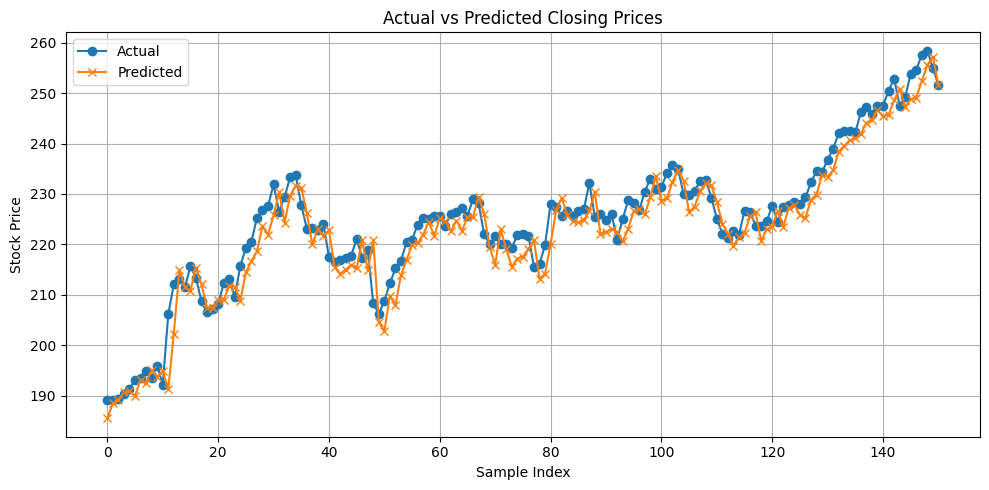

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()